In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import SCORERS
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading DF
df=pd.read_csv('GPD_data.csv')

In [3]:
# First 5 rows
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [4]:
# Last 5 rows
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.59665,865.4,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
907,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Size of df
df.size

22700

In [6]:
# rows*cols in df
df.shape

(908, 25)

In [7]:
# Base information of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [8]:
# count of unique values in df
df.country.value_counts()

IND    908
Name: country, dtype: int64

In [9]:
# Because there is only one value. This won't play any part in the model
df.drop('country',axis=1,inplace=True)
df.drop('country_long',axis=1,inplace=True)

In [10]:
# All cols in current df
df.columns

Index(['name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'other_fuel1', 'other_fuel2', 'other_fuel3',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'wepp_id', 'year_of_capacity_data', 'generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [11]:
# Val counts in column `names`
df.name.value_counts()

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADAMPARI                  1
KADANA                     1
KADRA                      1
KAHALGAON                  1
iEnergy Theni Wind Farm    1
Name: name, Length: 908, dtype: int64

In [12]:
# null values in col `wepp_id`
df.wepp_id.isna().sum()

908

In [13]:
# Because wepp_id column is null
df.drop('wepp_id',axis=1,inplace=True)

In [14]:
df.other_fuel1.isna().sum()

709

In [15]:
df.other_fuel2.isna().sum()

907

In [16]:
df.other_fuel3.isna().sum()

908

In [17]:
# Because columns are fully or majority of it is null
df.drop('other_fuel2',axis=1,inplace=True)
df.drop('other_fuel3',axis=1,inplace=True)

In [18]:
# Base info of current df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      908 non-null    object 
 1   gppd_idnr                 908 non-null    object 
 2   capacity_mw               908 non-null    float64
 3   latitude                  862 non-null    float64
 4   longitude                 862 non-null    float64
 5   primary_fuel              908 non-null    object 
 6   other_fuel1               199 non-null    object 
 7   commissioning_year        528 non-null    float64
 8   owner                     342 non-null    object 
 9   source                    908 non-null    object 
 10  url                       908 non-null    object 
 11  geolocation_source        889 non-null    object 
 12  year_of_capacity_data     520 non-null    float64
 13  generation_gwh_2013       384 non-null    float64
 14  generation

In [19]:
# Null column
df.drop('estimated_generation_gwh',axis=1,inplace=True)

In [20]:
# Number of missing values for each column
df[:].isna().sum()

name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
commissioning_year        380
owner                     566
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013       524
generation_gwh_2014       507
generation_gwh_2015       483
generation_gwh_2016       471
generation_gwh_2017       465
generation_data_source    458
dtype: int64

<AxesSubplot:>

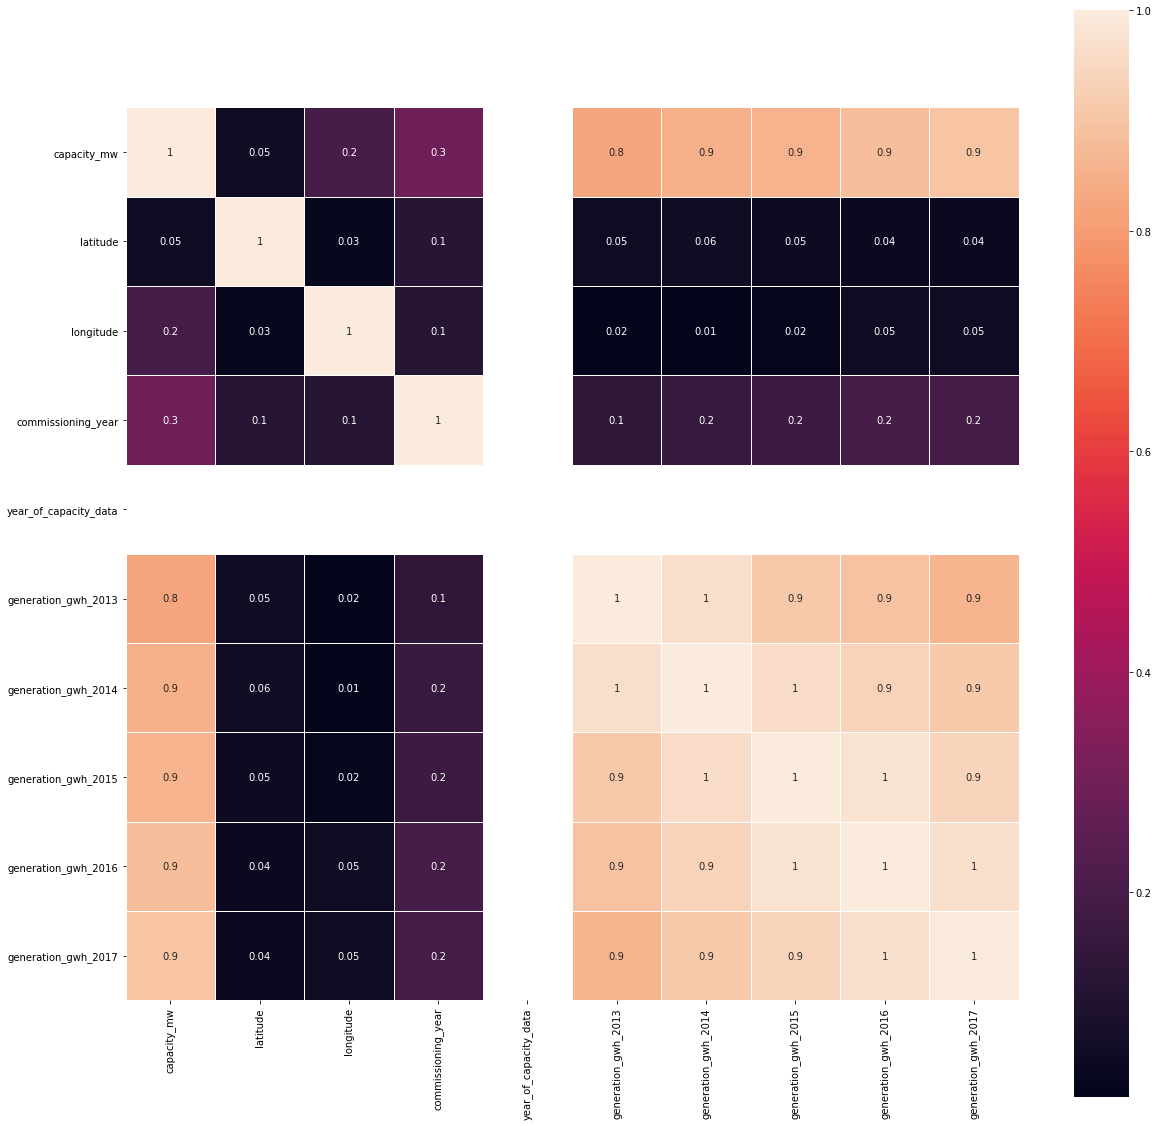

In [21]:
# correlatiion plot to see if any other features need to be dropped
df_corr=df.corr().abs()
plt.figure(figsize=(20,20))
sns.heatmap(df_corr,annot=True,square=True,fmt='.1g',linewidth=1)

In [22]:
# unique values in col == `year_of_capacity_data`
df.year_of_capacity_data.unique()

array([  nan, 2018.])

In [23]:
# dropping year_of_capacity_data because it only has 2018 and null data
df.drop('year_of_capacity_data',axis=1,inplace=True)

<AxesSubplot:>

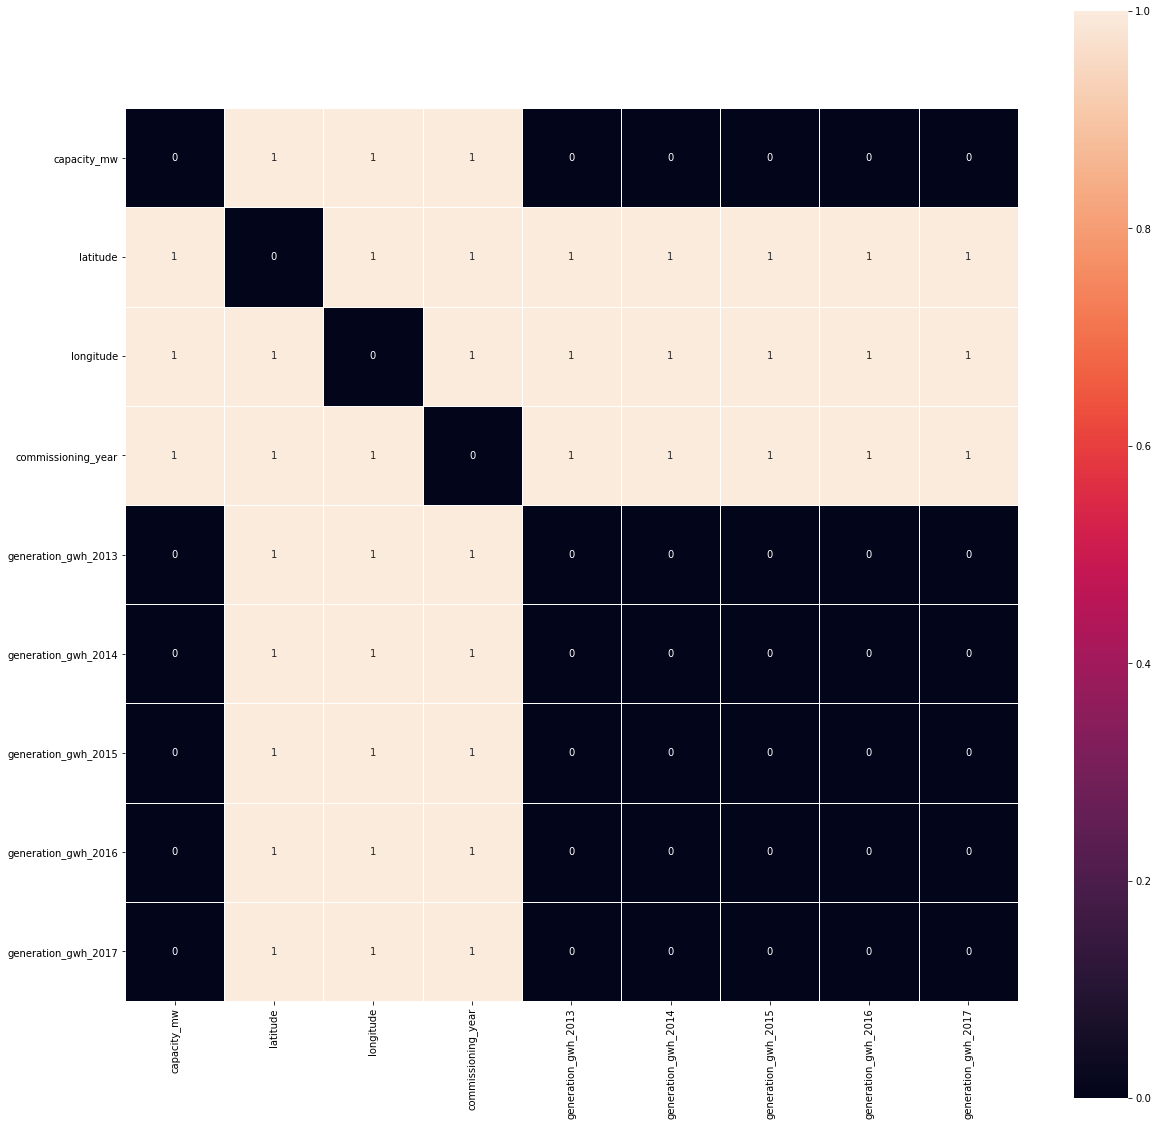

In [24]:
# correlatiion plot for corr<0.5
df_corr=df.corr().abs()
plt.figure(figsize=(20,20))
sns.heatmap(df_corr<0.5,annot=True,square=True,fmt='.1g',linewidth=1)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    908 non-null    object 
 1   gppd_idnr               908 non-null    object 
 2   capacity_mw             908 non-null    float64
 3   latitude                862 non-null    float64
 4   longitude               862 non-null    float64
 5   primary_fuel            908 non-null    object 
 6   other_fuel1             199 non-null    object 
 7   commissioning_year      528 non-null    float64
 8   owner                   342 non-null    object 
 9   source                  908 non-null    object 
 10  url                     908 non-null    object 
 11  geolocation_source      889 non-null    object 
 12  generation_gwh_2013     384 non-null    float64
 13  generation_gwh_2014     401 non-null    float64
 14  generation_gwh_2015     425 non-null    fl

In [26]:
# <<<<<<<<<< Need to use encoder to encode non-numerical features to numerical features >>>>>>>>>>>>>
lab_enc=LabelEncoder()

data=lab_enc.fit_transform(df['name'])
df['name']=data


data=lab_enc.fit_transform(df['gppd_idnr'])
df['gppd_idnr']=data


data=lab_enc.fit_transform(df['primary_fuel'])
df['primary_fuel']=data


data=lab_enc.fit_transform(df['other_fuel1'])
df['other_fuel1']=data


data=lab_enc.fit_transform(df['owner'])
df['owner']=data


data=lab_enc.fit_transform(df['source'])
df['source']=data


data=lab_enc.fit_transform(df['url'])
df['url']=data


data=lab_enc.fit_transform(df['geolocation_source'])
df['geolocation_source']=data


data=lab_enc.fit_transform(df['generation_data_source'])
df['generation_data_source']=data

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    908 non-null    int64  
 1   gppd_idnr               908 non-null    int64  
 2   capacity_mw             908 non-null    float64
 3   latitude                862 non-null    float64
 4   longitude               862 non-null    float64
 5   primary_fuel            908 non-null    int64  
 6   other_fuel1             908 non-null    int64  
 7   commissioning_year      528 non-null    float64
 8   owner                   908 non-null    int64  
 9   source                  908 non-null    int64  
 10  url                     908 non-null    int64  
 11  geolocation_source      908 non-null    int64  
 12  generation_gwh_2013     384 non-null    float64
 13  generation_gwh_2014     401 non-null    float64
 14  generation_gwh_2015     425 non-null    fl

In [28]:
# first 5 rows of df after encoding
df.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,0,658,2.5,28.1839,73.2407,6,3,2011.0,229,109,128,1,NaN,NaN,NaN,NaN,NaN,1
1,1,520,98.0,24.7663,74.6090,1,3,NaN,258,174,173,2,NaN,NaN,NaN,NaN,NaN,1
2,2,854,39.2,21.9038,69.3732,7,3,NaN,2,21,205,2,NaN,NaN,NaN,NaN,NaN,1
3,3,0,135.0,23.8712,91.3602,2,3,2004.0,280,22,58,2,631.777928,617.789264,843.747,886.004428,663.774500,0
4,4,1,1800.0,21.9603,82.4091,1,2,2015.0,280,22,58,2,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,0


In [29]:
df.primary_fuel.unique()

array([6, 1, 7, 2, 3, 0, 5, 4])

In [30]:
# na values in df
df.isnull().sum()

name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1                 0
commissioning_year        380
owner                       0
source                      0
url                         0
geolocation_source          0
generation_gwh_2013       524
generation_gwh_2014       507
generation_gwh_2015       483
generation_gwh_2016       471
generation_gwh_2017       465
generation_data_source      0
dtype: int64

In [31]:
df.commissioning_year.unique()

array([2011.,   nan, 2004., 2015., 2005., 1970., 2010., 2008., 2014.,
       1985., 1986., 1987., 2000., 1989., 2017., 1998., 1977., 1980.,
       2003., 1984., 1973., 1996., 1991., 2002., 2001., 2006., 2007.,
       1988., 2012., 1968., 1964., 2016., 2013., 1962., 1993., 1997.,
       1999., 1994., 1975., 1992., 1972., 1979., 1967., 1995., 1983.,
       1981., 1959., 1961., 1957., 1978., 1976., 1963., 1971., 1955.,
       2018., 2009., 1966., 1965., 1960., 1949., 1952., 1990., 1982.,
       1937., 1956., 1946., 1958., 1943., 1954., 1969., 1939., 1927.,
       1974., 1953.])

<AxesSubplot:xlabel='commissioning_year'>

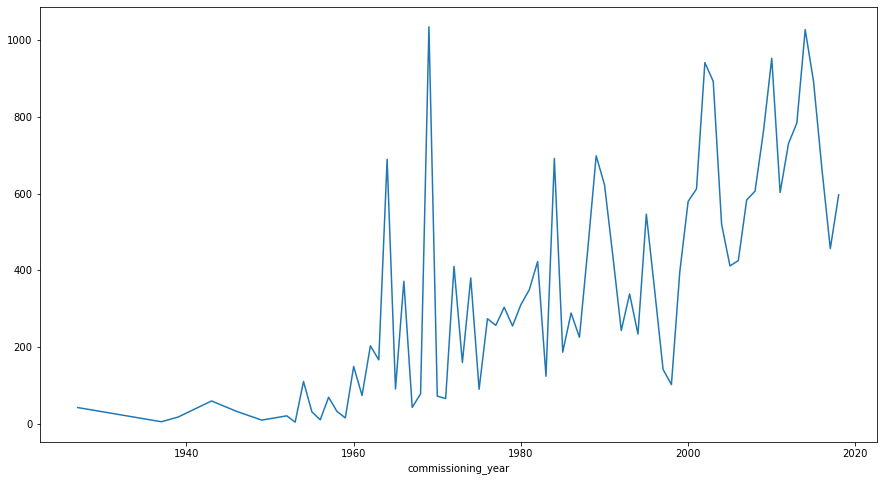

In [32]:
# Distribution of commisioning year vs capacity_nw
D=df.groupby('commissioning_year').mean()
plt.figure(figsize=(15,8))
D['capacity_mw'].plot()

In [33]:
# this bias was manually introduced because mean was affected by extremities
df['commissioning_year'].fillna(2005, inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    908 non-null    int64  
 1   gppd_idnr               908 non-null    int64  
 2   capacity_mw             908 non-null    float64
 3   latitude                862 non-null    float64
 4   longitude               862 non-null    float64
 5   primary_fuel            908 non-null    int64  
 6   other_fuel1             908 non-null    int64  
 7   commissioning_year      908 non-null    float64
 8   owner                   908 non-null    int64  
 9   source                  908 non-null    int64  
 10  url                     908 non-null    int64  
 11  geolocation_source      908 non-null    int64  
 12  generation_gwh_2013     384 non-null    float64
 13  generation_gwh_2014     401 non-null    float64
 14  generation_gwh_2015     425 non-null    fl

<AxesSubplot:xlabel='capacity_mw'>

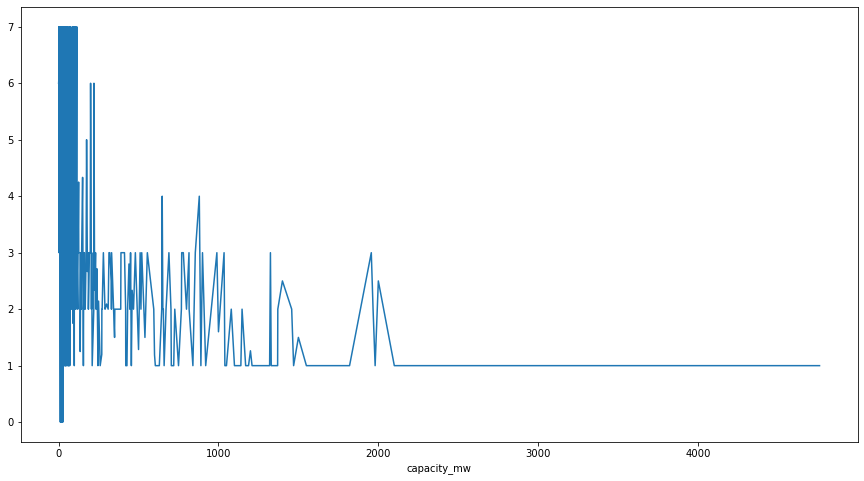

In [35]:
# Dependency between the two assigned labels
D=df.groupby('capacity_mw').mean()
plt.figure(figsize=(15,8))
D['primary_fuel'].plot()

In [36]:
df.describe()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
count,908.00000,908.00000,908.000000,862.000000,862.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,384.000000,401.000000,425.000000,437.000000,443.000000,908.000000
mean,453.50000,453.50000,321.046378,21.196189,77.447848,3.205947,2.776432,2000.276432,227.534141,43.823789,94.429515,1.754405,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0.504405
std,262.26132,262.26132,580.221767,6.248627,4.907260,2.281339,0.429886,13.599307,83.895877,44.624092,70.352824,0.699844,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,0.500256
min,0.00000,0.00000,0.000000,8.168900,68.644700,0.000000,0.000000,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,226.75000,226.75000,16.837500,16.771575,74.258975,1.000000,3.000000,1997.000000,188.750000,22.000000,58.000000,2.000000,244.458088,223.650436,174.174750,187.193669,177.643170,0.000000
50%,453.50000,453.50000,60.000000,21.778300,76.719250,3.000000,3.000000,2005.000000,280.000000,22.000000,58.000000,2.000000,797.063475,805.760000,701.027250,716.728350,807.601700,1.000000
75%,680.25000,680.25000,388.125000,25.516375,79.441475,6.000000,3.000000,2005.000000,280.000000,29.250000,115.250000,2.000000,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,1.000000
max,907.00000,907.00000,4760.000000,34.649000,95.408000,7.000000,3.000000,2018.000000,280.000000,190.000000,303.000000,3.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,1.000000


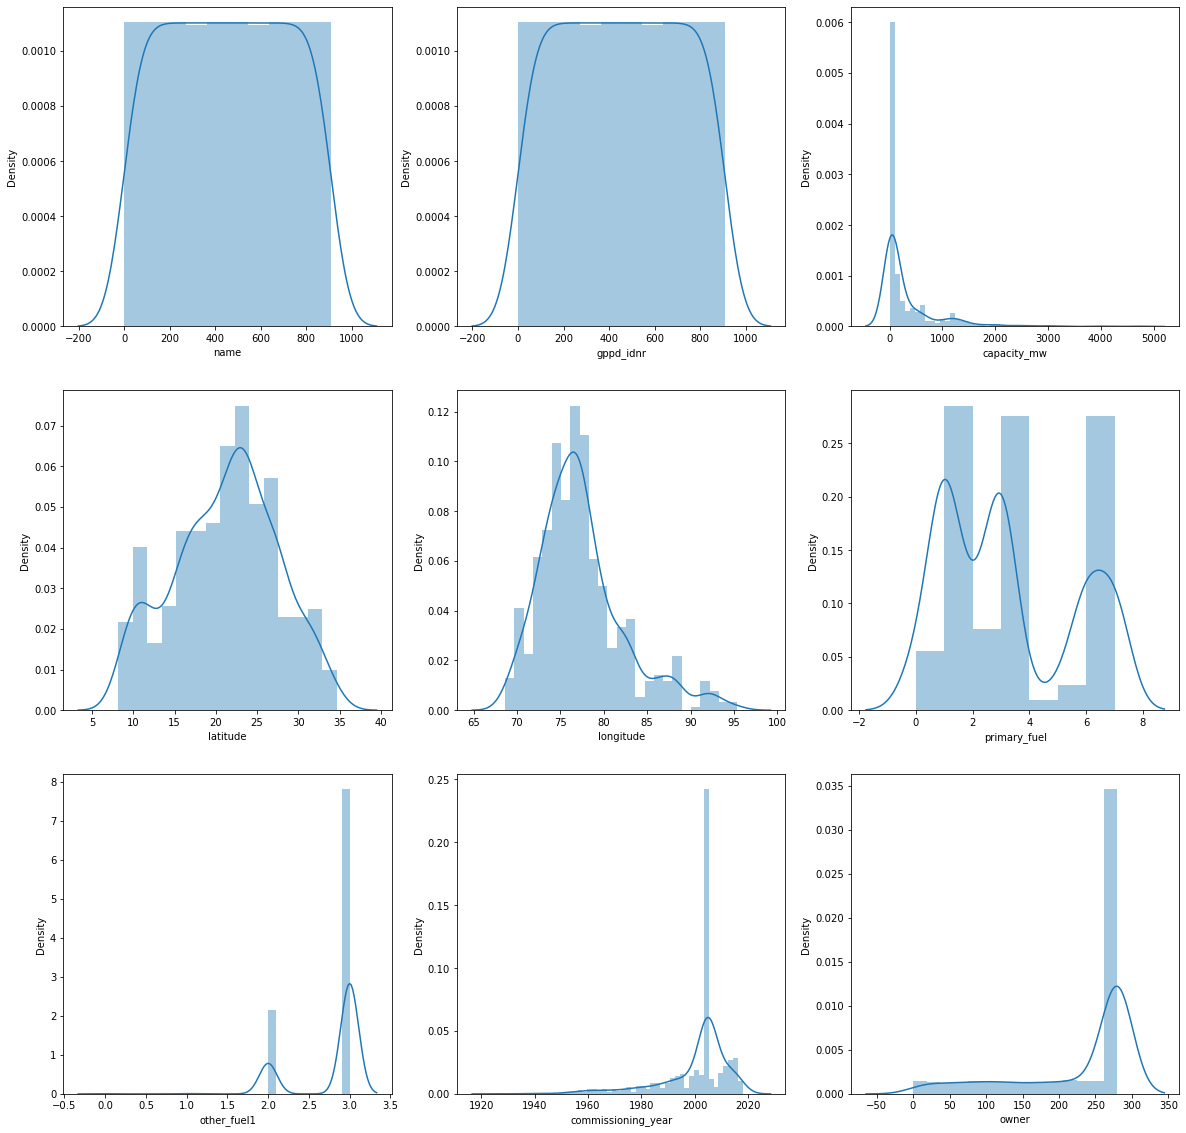

In [37]:
#Distribution of the df
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for i in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i)
    plotnumber+=1

- signs of skew and outliers seen

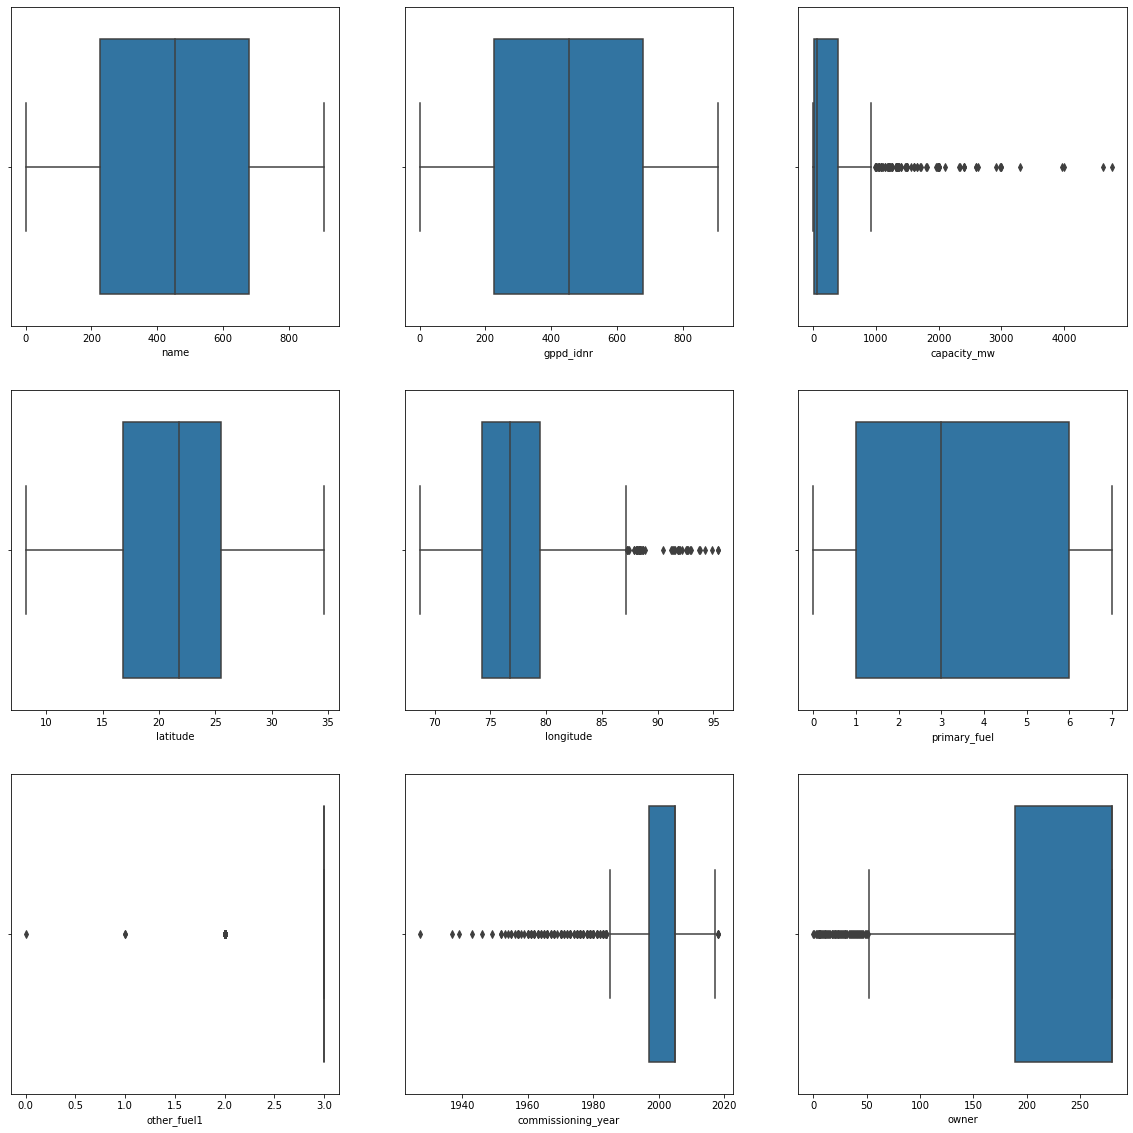

In [38]:
# Detecting Outliers
plt.figure(figsize=(20,20))
plotnumber=1
for i in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[i])
        plt.xlabel(i)
    plotnumber+=1

In [39]:
#Removing outliers using zscore
z=np.abs(stats.zscore(df))
np.where(z>3)

(array([ 15,  72,  81, 144, 192, 210, 219, 222, 300, 309, 322, 343, 346,
        364, 365, 372, 376, 445, 455, 479, 483, 485, 494, 495, 539, 542,
        575, 584, 593, 602, 622, 649, 658, 662, 670, 690, 696, 707, 710,
        727, 729, 787, 789, 808, 809, 812, 814, 818, 833, 849, 871, 872,
        880, 881, 896, 901]),
 array([2, 9, 9, 2, 9, 2, 7, 7, 9, 2, 9, 7, 9, 2, 2, 7, 2, 7, 7, 7, 2, 7,
        2, 2, 7, 7, 7, 7, 7, 7, 7, 2, 2, 9, 9, 9, 2, 7, 7, 2, 7, 2, 2, 7,
        2, 6, 6, 6, 9, 7, 9, 9, 9, 2, 9, 9]))

In [40]:
# Dropping rows where z>3
index=(np.where(z>3)[0])
df=df.drop(df.index[index])

In [41]:
df.shape

(852, 18)

- 908-852 = 56 rows dropped || 6.16% data loss

In [42]:
# Skew values before treatment
df.skew()

name                      0.027883
gppd_idnr                -0.025975
capacity_mw               1.989197
latitude                 -0.148086
longitude                 1.141314
primary_fuel              0.434076
other_fuel1              -1.434523
commissioning_year       -1.526632
owner                    -1.279267
source                    1.808916
url                       1.462144
geolocation_source       -1.878543
generation_gwh_2013       2.061670
generation_gwh_2014       1.881980
generation_gwh_2015       1.846220
generation_gwh_2016       1.722150
generation_gwh_2017       1.540894
generation_data_source   -0.037632
dtype: float64

In [43]:
df.columns

Index(['name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'other_fuel1', 'commissioning_year', 'owner', 'source',
       'url', 'geolocation_source', 'generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_data_source'],
      dtype='object')

In [56]:
# filling missing vaues using mean
df.fillna(df.mean(), inplace=True)

In [57]:
# separating labels and data to predict primary fuel
x=df.drop(columns=['primary_fuel'],axis=1)
y=df['primary_fuel']

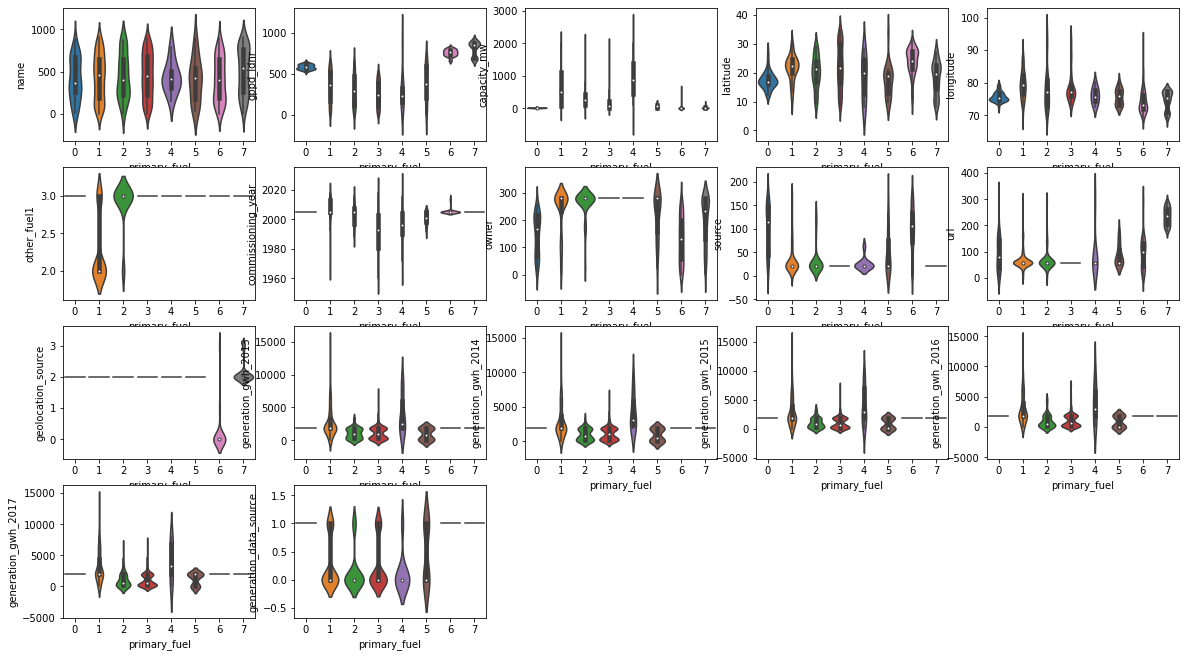

In [58]:
# Relation between features and labels using violin plot
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for column in x:
    if plotnumber<=35:
        ax=plt.subplot(7,5,plotnumber)
        sns.violinplot(y,x[column])
    plotnumber+=1

In [59]:
power = PowerTransformer(method='yeo-johnson', standardize=True)
data_new = power.fit_transform(x)

In [60]:
# Skew values after treatment
data_new=pd.DataFrame(data_new,columns=x.columns)
data_new.skew()

name                     -0.281696
gppd_idnr                -0.303647
capacity_mw               0.009135
latitude                 -0.078198
longitude                 0.000276
other_fuel1              -1.434523
commissioning_year       -0.798942
owner                    -0.962227
source                   -0.190369
url                       0.065570
geolocation_source       -0.028079
generation_gwh_2013       0.086976
generation_gwh_2014       0.006508
generation_gwh_2015      -0.067454
generation_gwh_2016      -0.088779
generation_gwh_2017      -0.130617
generation_data_source   -0.037632
dtype: float64

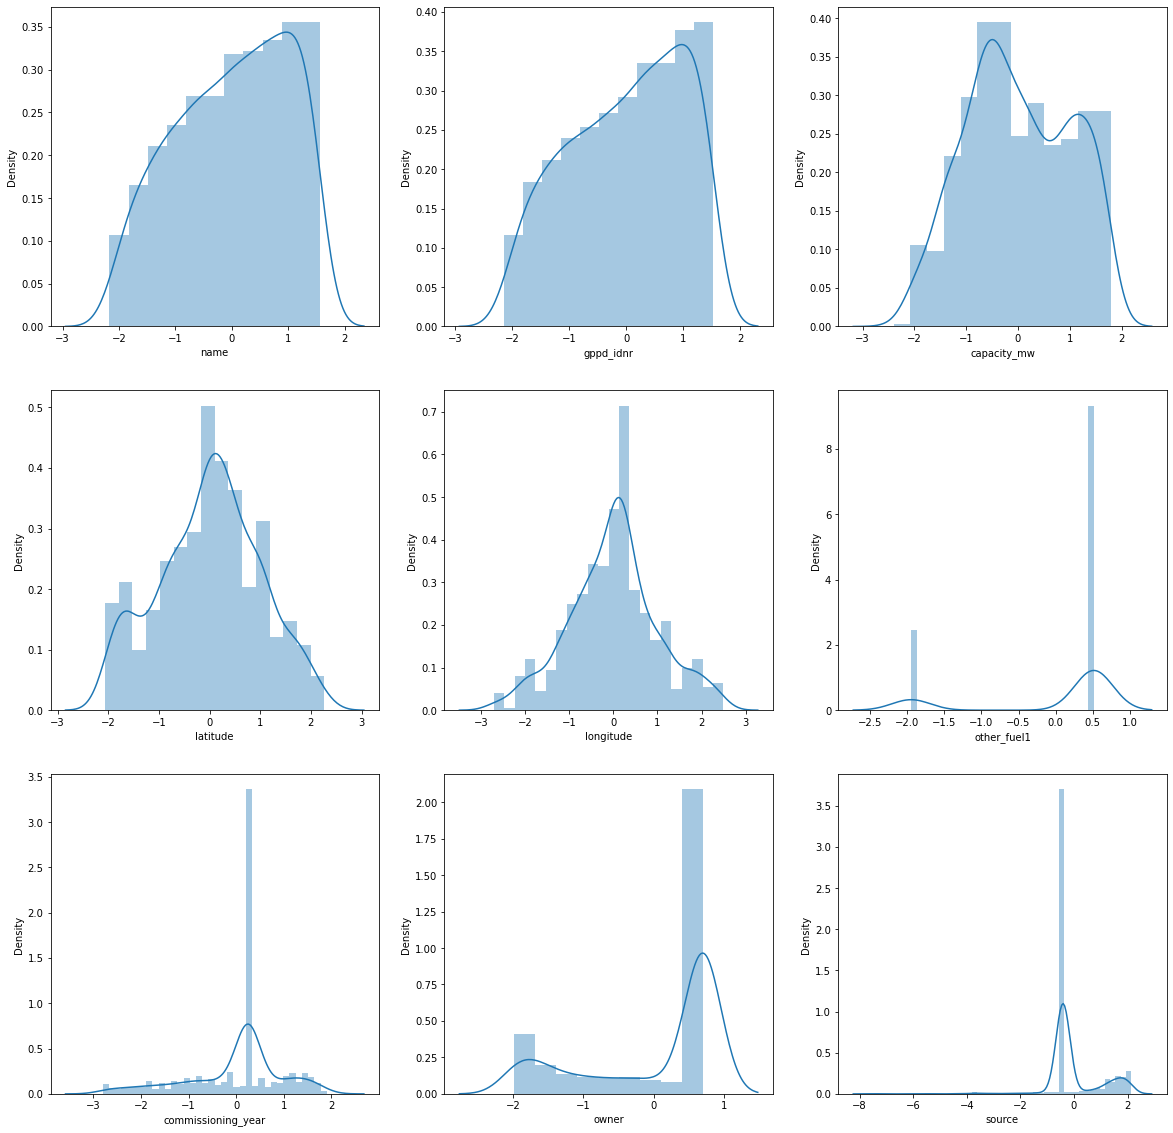

In [61]:
# Distibution after fixing skew and outliers
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for i in data_new:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data_new[i])
        plt.xlabel(i)
    plotnumber+=1

In [62]:
x = data_new

### Model

In [63]:
import GPUtil
GPUtil.showUtilization()

| ID | GPU | MEM |
------------------
|  0 |  6% |  5% |


In [64]:
# Finding best random state
min_squared_error = 0
max_random_state = 1
for i in range(1,200):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
    model=XGBRegressor(tree_method='gpu_hist', gpu_id=0)
    model.fit(X_train,y_train)
    pred= model.predict(X_test)
    root_mean_squared_error=np.sqrt(mean_squared_error(y_test,pred))
    if root_mean_squared_error<min_squared_error:
        min_squared_error=root_mean_squared_error
        max_random_state=i
        
print('lowest error is: ',min_squared_error,' on random_state ',max_random_state)

lowest error is:  0  on random_state  1


In [65]:
# List of regressors and scorers

en = ElasticNet()
dtr = DecisionTreeRegressor(random_state=1)
rfr = RandomForestRegressor(random_state=1)
ar = AdaBoostRegressor(random_state=1)
gbr= GradientBoostingRegressor(random_state=1)
sr = SVR()
lgr=LGBMRegressor(random_state=1)
xgbr = XGBRegressor(tree_method='gpu_hist', gpu_id=0, random_state = 1)

m_list= [en,dtr,rfr,ar,gbr,sr,lgr,xgbr]

s=SCORERS
s.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [66]:
# Splitting into training and testing data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [67]:
# Training models and getting CV score
for m in m_list:
    m.fit(X_train,y_train)
    preds = m.predict(X_test)
    rmse= np.sqrt(mean_squared_error(y_test,preds))
    print(m)
    print('Root_mean_squared_error: ',rmse)
    print('cross validation scores below:--  \n',m)
    print('root_mean_squared_error: ',cross_val_score(m,x,y,cv=5,scoring='neg_root_mean_squared_error').mean())
    print('difference between model score and cross validation score: ',-rmse-cross_val_score(m,x,y,cv=5,scoring='neg_root_mean_squared_error').mean())
    print('\n')
    print('\n')

ElasticNet()
Root_mean_squared_error:  1.8189980695617203
cross validation scores below:--  
 ElasticNet()
root_mean_squared_error:  -1.8206231623664118
difference between model score and cross validation score:  0.0016250928046914748




DecisionTreeRegressor(random_state=1)
Root_mean_squared_error:  0.6051422833504461
cross validation scores below:--  
 DecisionTreeRegressor(random_state=1)
root_mean_squared_error:  -0.6648001749206898
difference between model score and cross validation score:  0.059657891570243704




RandomForestRegressor(random_state=1)
Root_mean_squared_error:  0.5131697501687555
cross validation scores below:--  
 RandomForestRegressor(random_state=1)
root_mean_squared_error:  -0.5046568076264817
difference between model score and cross validation score:  -0.00851294254227386




AdaBoostRegressor(random_state=1)
Root_mean_squared_error:  0.5816848436470327
cross validation scores below:--  
 AdaBoostRegressor(random_state=1)
root_mean_squared_error:  -0.6751992

## Hyper-Parameter Tuning (HPT) 

In [79]:
# Parameter Grid
grid_param = {'copy_X':['True','False'],
              'warm_start':['True','False'],
              'normalize':['True','False'],
              'max_iter':[int(x) for x in np.linspace(1000, 50000, num = 1000)],
              'selection':['cyclic','random']}

In [81]:
# Using GridSearchCv to find best optimal state
grid_search=GridSearchCV(ElasticNet(random_state=1),param_grid=grid_param,cv=5,n_jobs=15,verbose = 2,scoring='neg_root_mean_squared_error')
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16000 candidates, totalling 80000 fits


GridSearchCV(cv=5, estimator=ElasticNet(random_state=1), n_jobs=15,
             param_grid={'copy_X': ['True', 'False'],
                         'max_iter': [1000, 1049, 1098, 1147, 1196, 1245, 1294,
                                      1343, 1392, 1441, 1490, 1539, 1588, 1637,
                                      1686, 1735, 1784, 1833, 1882, 1931, 1980,
                                      2030, 2079, 2128, 2177, 2226, 2275, 2324,
                                      2373, 2422, ...],
                         'normalize': ['True', 'False'],
                         'selection': ['cyclic', 'random'],
                         'warm_start': ['True', 'False']},
             scoring='neg_root_mean_squared_error', verbose=2)

In [82]:
# List of best parameters
grid_search.best_params_

{'copy_X': 'True',
 'max_iter': 1000,
 'normalize': 'True',
 'selection': 'cyclic',
 'warm_start': 'True'}

In [83]:
# Fitting model with best params
m = ElasticNet(random_state=1,copy_X= True,max_iter= 1000, normalize= True, selection= 'cyclic', warm_start= True)
m.fit(X_train,y_train)
preds = m.predict(X_test)
rmse= np.sqrt(mean_squared_error(y_test,preds))
print(m)
print('Root_mean_squared_error: ',rmse)
print('cross validation scores below:--  \n',m)
print('root_mean_squared_error: ',cross_val_score(m,x,y,cv=5,scoring='neg_root_mean_squared_error').mean())
print('difference between model score and cross validation score: ',-rmse-cross_val_score(m,x,y,cv=5,scoring='neg_root_mean_squared_error').mean())

ElasticNet(normalize=True, random_state=1, warm_start=True)
Root_mean_squared_error:  2.3363589267171334
cross validation scores below:--  
 ElasticNet(normalize=True, random_state=1, warm_start=True)
root_mean_squared_error:  -2.304233844931116
difference between model score and cross validation score:  -0.03212508178601725


## Model Saving

In [84]:
import joblib

joblib.dump(m,'ElasticNet_regressor_best.obj')

['ElasticNet_regressor_best.obj']

In [85]:
joblib.load('ElasticNet_regressor_best.obj')

ElasticNet(normalize=True, random_state=1, warm_start=True)

## Second Model<br>
#### <b>Note</b> 
This model was built because there was some discrepency in the question that was given.<br><b><i> 
    <li> Please ignore if this does not apply</li></i></b> <br><br><br><br>
the following was said in the question<br><br>
Fuel Type Aggregation<br>
We define the "Fuel Type" attribute of our database based on common fuel categories. <br>

Prediction :   Make two prediction  1) Fuel Type   2) capacity_mw <br>
 - This just made noo sense because theres no point is the model was given these two labels together. So I built them separately

## Description not provided henceforth because it follows the same format as the previous model

In [87]:
x=df.drop(columns=['capacity_mw'],axis=1)
y=df['capacity_mw']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [90]:
for m in m_list:
    m.fit(X_train,y_train)
    preds = m.predict(X_test)
    rmse= np.sqrt(mean_squared_error(y_test,preds))
    print(m)
    print('Root_mean_squared_error: ',rmse)
    print('cross validation scores below:--  \n',m)
    print('root_mean_squared_error: ',cross_val_score(m,x,y,cv=5,scoring='neg_root_mean_squared_error').mean())
    print('difference between model score and cross validation score: ',-rmse-cross_val_score(m,x,y,cv=5,scoring='neg_root_mean_squared_error').mean())
    print('\n')
    print('\n')

ElasticNet()
Root_mean_squared_error:  188.73646190164732
cross validation scores below:--  
 ElasticNet()
root_mean_squared_error:  -240.05718583358333
difference between model score and cross validation score:  51.320723931936016




DecisionTreeRegressor(random_state=1)
Root_mean_squared_error:  199.6397311740547
cross validation scores below:--  
 DecisionTreeRegressor(random_state=1)
root_mean_squared_error:  -246.54321401821912
difference between model score and cross validation score:  46.903482844164415




RandomForestRegressor(random_state=1)
Root_mean_squared_error:  157.1978697276731
cross validation scores below:--  
 RandomForestRegressor(random_state=1)
root_mean_squared_error:  -198.02520061363705
difference between model score and cross validation score:  40.82733088596396




AdaBoostRegressor(random_state=1)
Root_mean_squared_error:  250.29941163127455
cross validation scores below:--  
 AdaBoostRegressor(random_state=1)
root_mean_squared_error:  -273.6121196756385
d

In [106]:
grid_param = {
    'learning_rate': [0.001, 0.01, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'n_estimators':[int(x) for x in np.linspace(start = 100, stop = 1200, num = 5)],
    'objective': ['reg:squarederror']}


In [107]:
grid_search=GridSearchCV(XGBRegressor(random_state=1,tree_method='gpu_hist', gpu_id=0),param_grid=grid_param,cv=5,n_jobs=12,verbose = 2,scoring='neg_root_mean_squared_error')
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 135 candidates, totalling 675 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None, gpu_id=0,
                                    importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=Non...
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method='gpu_hist',
                                    validate_parameters=None, verbosity=None),
         

In [108]:
grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 5,
 'n_estimators': 100,
 'objective': 'reg:squarederror'}

In [116]:
m = XGBRegressor(random_state=1,tree_method='gpu_hist', gpu_id=0,learning_rate= 0.1, max_depth= 3, min_child_weight= 5, n_estimators= 100, objective= 'reg:squarederror')
m.fit(X_train,y_train)
preds = m.predict(X_test)
rmse= np.sqrt(mean_squared_error(y_test,preds))
print(m)
print('Root_mean_squared_error: ',rmse)
print('cross validation scores below:--  \n',m)
print('root_mean_squared_error: ',cross_val_score(m,x,y,cv=5,scoring='neg_root_mean_squared_error').mean())
print('difference between model score and cross validation score: ',-rmse-cross_val_score(m,x,y,cv=5,scoring='neg_root_mean_squared_error').mean())

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=5, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=24, num_parallel_tree=1, random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='gpu_hist', validate_parameters=1, verbosity=None)
Root_mean_squared_error:  163.74715151531535
cross validation scores below:--  
 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=5, missing=nan, monotone_constraints='()',
         

## Model Saving

In [117]:
import joblib

joblib.dump(m,'XGB_regressor_best.obj')

['XGB_regressor_best.obj']

In [118]:
joblib.load('XGB_regressor_best.obj')

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=5, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=24, num_parallel_tree=1, random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='gpu_hist', validate_parameters=1, verbosity=None)